<a href="https://colab.research.google.com/github/envomp/2020-Text-Mining/blob/master/week2/Quantitative_measures_of_text_complexity_for_the_Independence_Day_speeches_of_the_Presidents_of_the_Republic_of_Estonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install conllu estnltk==1.6.7b0

Esmalt loeb failid listi ning viib nad paremini käideltatavale kujule

In [155]:
from estnltk import Text
from html import unescape
import re

sample_data = [
    ("Kersti Kaljuraid", ["2020.txt", "2019.txt", "2018.txt"]),
    ("Toomas Hendrik Ilves", ["2016.txt", "2015.txt", "2014.txt"]),
    ("Arnold Rüütel", ["2006.txt", "2005.txt", "2004.txt"]),
    ("Lennart Meri", ["2001.txt", "2000.txt", "1999.txt"])
]

def formatted_data(filename):
  return open(filename, "r").read()

texts = [
    (
      name, 
      Text("\n\n\n".join([formatted_data(filename) for filename in filenames])).analyse('all')
    ) for name, filenames in sample_data
]


 Flesch Reading Ease Score(FRES) skoor
 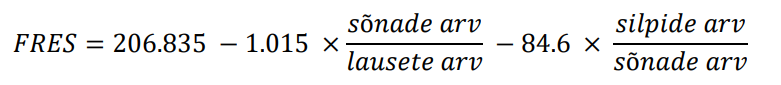

In [ ]:
def count_syllables(word: str) -> int:
    syllable_count = 0
    vowels = "aeiouõäöü"
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

In [162]:
def get_fres(text):
  words = len(text.words)
  sentences = len(text.sentences)
  syllables = sum([count_syllables(x.text) for x in text.words])
  return round(206.835 - 1.015 * words / sentences - 84.6 * syllables / words, 2)

def get_fres_1_sentence(words):
  words = len(text.words)
  syllables = sum([count_syllables(x.text) for x in text.words])
  return round(206.835 - 1.015 * words - 84.6 * syllables / words, 2)


Gunning FOG:

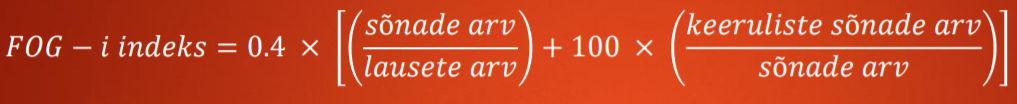

- Keerulised sõnad koosnevad kolmest või enamast silbist
- Loendatakse vaid sõnatüve silpe
- Liitsõna loetaks keeruliseks, kui vähemalt üks selle osa on kolmesilbiline
- Keerukaks ei loeta nimesid ja lühendeid

In [161]:
def get_gunning_fog(text):
  words = len(text.words)
  sentences = len(text.sentences)
  difficult_words = sum([count_syllables(x.root) >= 3 for x in text.words])
  return round(0.4 * words / sentences + 100 * difficult_words / words, 2)

def get_gunning_fog_1_sentence(words):
  words = len(text.words)
  difficult_words = sum([count_syllables(x.root) >= 3 for x in text.words])
  return round(0.4 * words + 100 * difficult_words / words, 2)


Leksikaalne tihedus:
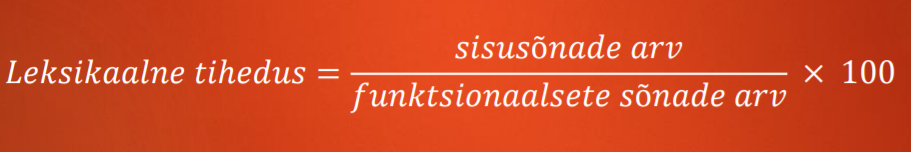

In [159]:
def get_lexical_density(text):
  content_words = []
  functional_words = []
  for word in text.words:
    if set(word.partofspeech) & set(['A', 'V', 'S']):
      content_words.append(word)
    else:
      functional_words.append(word)
  return round(100 * len(content_words) / len(functional_words), 2)

def get_lexical_density_1_sentence(words):
  content_words = []
  functional_words = []
  for word in text.words:
    if set(word.partofspeech) & set(['A', 'V', 'S']):
      content_words.append(word)
    else:
      functional_words.append(word)
  return round(100 * len(content_words) / len(functional_words), 2)

F-indeks - näitab teksti formaalsust

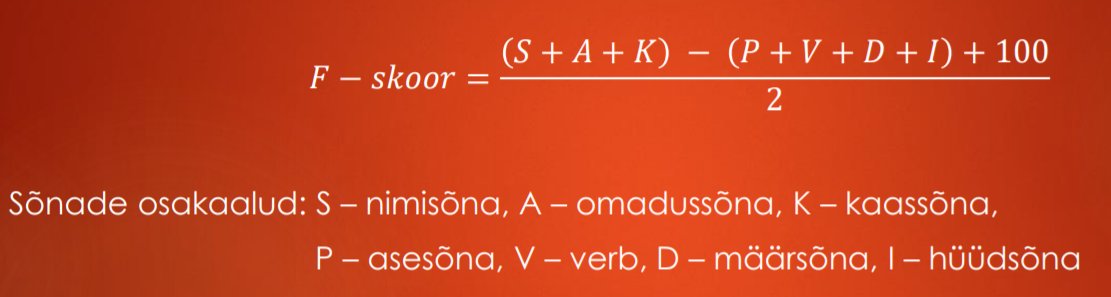

In [163]:
def get_formality(text):
  running_score = 0
  for word in text.words:
    if set(word.partofspeech) & set(['S', 'A', 'K']):
      running_score += 1
    else:
      running_score -= 1
  return round((100 + running_score) / 2, 2)

def get_formality_1_sentence(words):
  running_score = 0
  for word in text.words:
    if set(word.partofspeech) & set(['S', 'A', 'K']):
      running_score += 1
    else:
      running_score -= 1
  return round((100 + running_score) / 2, 2)

Analüüsib tervik tekste

In [164]:
for president, text in texts:
  print(f"president: {president} - FRES: {get_fres(text)}")
  print(f"president: {president} - Gunning FOG: {get_gunning_fog(text)}")
  print()

president: Kersti Kaljuraid - FRES: 12.59
president: Kersti Kaljuraid - Gunning FOG: 6.0

president: Toomas Hendrik Ilves - FRES: 13.09
president: Toomas Hendrik Ilves - Gunning FOG: 5.37

president: Arnold Rüütel - FRES: -16.99
president: Arnold Rüütel - Gunning FOG: 6.4

president: Lennart Meri - FRES: -2.4
president: Lennart Meri - Gunning FOG: 6.05



FRES test ei anna meile hetkel teksti keerukuse taset, kuna test pole kohandatud Eesti keele jaoks. Aga see-eest annab võrdluspunkti. Rüütli tekst oli kõige keerulisem aru saadav.

Loengus näidatud slaidi järgi peaks olema tekst teskt isegi esimese klassi õpilase jaoks jõukohane ning FRES testi järgi peaks olema see isegi ülikooli lõpetanu jaoks keeruline:

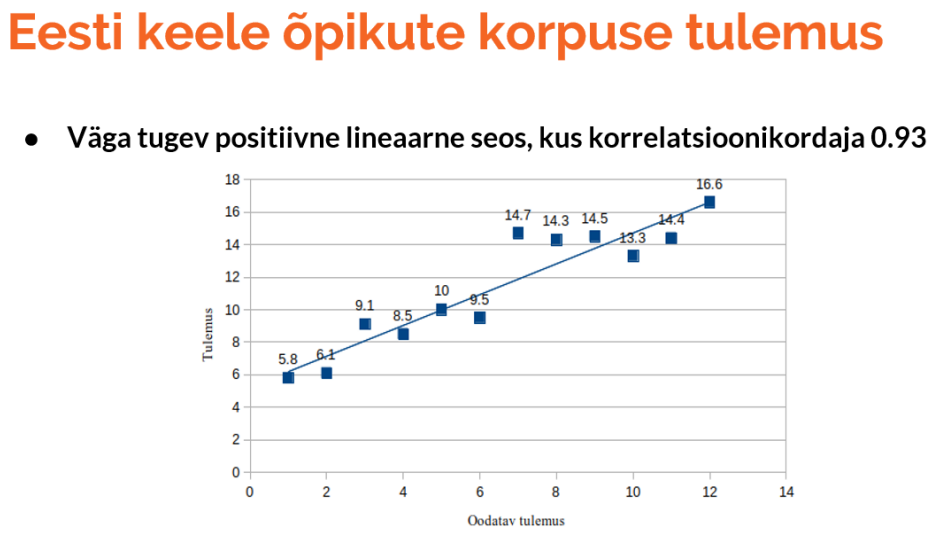

Otsib järgnevalt kõige raskemini ja kergemini loetavad laused iga presidendi jaoks:

Vaatleb presidentide leksikaalseid tihedusi

In [165]:
for president, text in texts:
  print(f"president: {president} - FRES: {get_lexical_density(text)}")
  print()


president: Kersti Kaljuraid - FRES: 91.0

president: Toomas Hendrik Ilves - FRES: 86.73

president: Arnold Rüütel - FRES: 122.78

president: Lennart Meri - FRES: 104.19



Tuleb välja, et Rüütli tekst oli küige informatiivsem

Vaatleb F-skoori

In [166]:
for president, text in texts:
  print(f"president: {president} - F-index: {get_formality(text)}")
  print()

president: Kersti Kaljuraid - F-index: -1309.0

president: Toomas Hendrik Ilves - F-index: -1411.0

president: Arnold Rüütel - F-index: -419.5

president: Lennart Meri - F-index: -1071.5



Tuleb välja, et ka Rüütli tekst on kõige formaalsem

In [167]:
import heapq
for president, text in texts:
  gfog = []
  fres = []
 
  for sentence in text.sentences:
    try:
      heapq.heappush(gfog, (get_gunning_fog_1_sentence(sentence), sentence))
      heapq.heappush(fres, (get_fres_1_sentence(sentence), sentence))
    except Exception:
      pass
  
  def get_n_of_side_from_heap_for_president_in_stdout(n, president, heap, heap_type, operation, operation_name):
    print(f"presidendi {president} jaoks {n} {operation_name} lauset {heap_type}'i järgi on:")
    print()
    for i, (_, sentence) in enumerate(operation(n, heap)):
      print(" ".join(sentence.text))
    print()
    print()
 
  get_n_of_side_from_heap_for_president_in_stdout(5, president, gfog, "Gunning FOG", heapq.nlargest, "kõige raskemat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, gfog, "Gunning FOG", heapq.nsmallest, "kõige lihtsamat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, fres, "FRES", heapq.nsmallest, "kõige raskemat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, fres, "FRES", heapq.nlargest, "kõige lihtsamat")
  print()
  print()

presidendi Kersti Kaljuraid jaoks 5 kõige raskemat lauset Gunning FOG'i järgi on:

Hoiame Eestit !
Me hoiame Sind !
Palju õnne veel kord , armas Eesti , ja edu Sulle !
Läheb edasi meie töö , et uued eestlaste põlvkonnad saaks meie käest jällegi nii korras Eesti ja nii väärika Eesti riigi , kui asjaolud ja meie endi otsused koosmõjus võimaldavad .
Kompass peos , eesti keel suus , toetudes Eesti kultuuri ja kooli loodud vundamendile , saades jõudu Eestimaa puhtast loodusest , asume julgesti teele .


presidendi Kersti Kaljuraid jaoks 5 kõige lihtsamat lauset Gunning FOG'i järgi on:

Karuldasa jänelevad loomad
Jänestisse kareldavad end
Karustavad jänelmu ja loovad
Jäneskarust kõrgemale end .
Selline väike kokkuvõte eelmise aasta kulgemisest .


presidendi Kersti Kaljuraid jaoks 5 kõige raskemat lauset FRES'i järgi on:

Karuldasa jänelevad loomad
Jänestisse kareldavad end
Karustavad jänelmu ja loovad
Jäneskarust kõrgemale end .
Selline väike kokkuvõte eelmise aasta kulgemisest .


presiden

In [169]:
import heapq
for president, text in texts:
  density = []

  for sentence in text.sentences:
    try:
      heapq.heappush(density, (get_lexical_density(sentence), sentence))
    except Exception:
      pass
  
  def get_n_of_side_from_heap_for_president_in_stdout(n, president, heap, operation, operation_name):
    print(f"presidendi {president} jaoks {n} {operation_name} lauset järgi on:")
    print()
    for i, (_, sentence) in enumerate(operation(n, heap)):
      print(" ".join(sentence.text))
    print()
    print()
 
  get_n_of_side_from_heap_for_president_in_stdout(5, president, density, heapq.nlargest, "kõige informatiivsemat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, density, heapq.nsmallest, "kõige vähem informatiivsemat")
  print()
  print()

presidendi Kersti Kaljuraid jaoks 5 kõige informatiivsemat lauset järgi on:

Positiivne tuntus on oluline julgeolekut kasvatav mõõde .
Vihastest sõnadest võib sündida ühiskonda vapustavaid tegusid .
Õmblusteta ühiskond sünnib juhtide tarkusest .
valge lume sadaden läks koju ,
Valu astel ooperist läks koju ,


presidendi Kersti Kaljuraid jaoks 5 kõige vähem informatiivsemat lauset järgi on:

Karujäntsist kõrgemale end .
Ei .
Aga mis Pearudel sellest .
“ .
—




presidendi Toomas Hendrik Ilves jaoks 5 kõige informatiivsemat lauset järgi on:

Liitlasvägede tulek alliansi piiririikidesse on vastus uuele reaalsusele .
Kaasaegne lähenemine on laiendanud Tõe mõistet .
Veel ei ohusta juhita autod autojuhtide töökohti .
Tervise hoidmine sõltub suures osas meist endist .
Tõde õnneks tõusiski .


presidendi Toomas Hendrik Ilves jaoks 5 kõige vähem informatiivsemat lauset järgi on:

Ka Eestile .
Kui üldse .
Nagu igal pool , ka Eestis .
Aga mitte ainult .
Samuti NATO puhul .




presidendi Arnold R

In [168]:
import heapq
for president, text in texts:
  formality = []

  for sentence in text.sentences:
    try:
      heapq.heappush(formality, (get_formality_1_sentence(sentence), sentence))
    except Exception:
      pass
  
  def get_n_of_side_from_heap_for_president_in_stdout(n, president, heap, operation, operation_name):
    print(f"presidendi {president} jaoks {n} {operation_name} lauset järgi on:")
    print()
    for i, (_, sentence) in enumerate(operation(n, heap)):
      print(" ".join(sentence.text))
    print()
    print()
 
  get_n_of_side_from_heap_for_president_in_stdout(5, president, formality, heapq.nlargest, "kõige formaalsemat")
  get_n_of_side_from_heap_for_president_in_stdout(5, president, formality, heapq.nsmallest, "kõige vähem formaalsemat")
  print()
  print()

presidendi Kersti Kaljuraid jaoks 5 kõige formaalsemat lauset järgi on:

Hoiame Eestit !
Me hoiame Sind !
Palju õnne veel kord , armas Eesti , ja edu Sulle !
Läheb edasi meie töö , et uued eestlaste põlvkonnad saaks meie käest jällegi nii korras Eesti ja nii väärika Eesti riigi , kui asjaolud ja meie endi otsused koosmõjus võimaldavad .
Kompass peos , eesti keel suus , toetudes Eesti kultuuri ja kooli loodud vundamendile , saades jõudu Eestimaa puhtast loodusest , asume julgesti teele .


presidendi Kersti Kaljuraid jaoks 5 kõige vähem formaalsemat lauset järgi on:

Karuldasa jänelevad loomad
Jänestisse kareldavad end
Karustavad jänelmu ja loovad
Jäneskarust kõrgemale end .
Selline väike kokkuvõte eelmise aasta kulgemisest .




presidendi Toomas Hendrik Ilves jaoks 5 kõige formaalsemat lauset järgi on:

Elagu Eesti !
Elagu meie Eesti kodu !
Aga ta jääb , erinevalt mistahes majast , kohaks , kuhu me saame alati tagasi tulla ja kus me ikka tahame olla .
Kodu , millest võib lahkuda kasvõ

Hinnang:

---



Lõppkokkuvõteks ilmnes, et Rüütli kõned on kõige raskemad, formaalsemad ning tihedamad

